In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Churn Data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### replacing blanks with 0 as tenure is also 0 and no total changes are recorded.

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [10]:
df.isnull().sum().sum()

0

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.duplicated().sum()

0

In [15]:
df["customerID"].duplicated().sum()

0

In [16]:
def conv(value):
    if value == 1:
        return("Yes")
    else:
        return ("No")

In [17]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [18]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


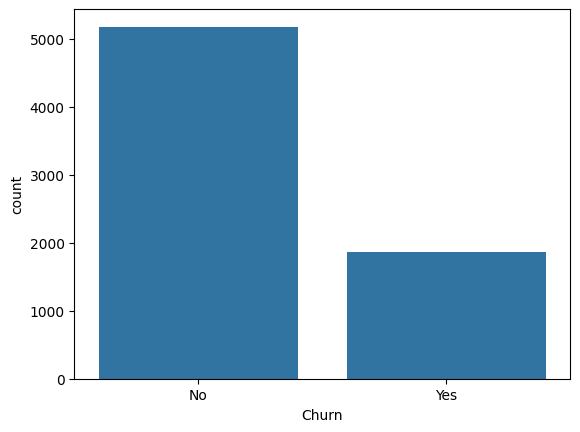

In [26]:
sns.countplot(x = "Churn", data = df)
plt.show()

#### Here in the graph, it is not showing the count of SeniorCitizen. So we will do......

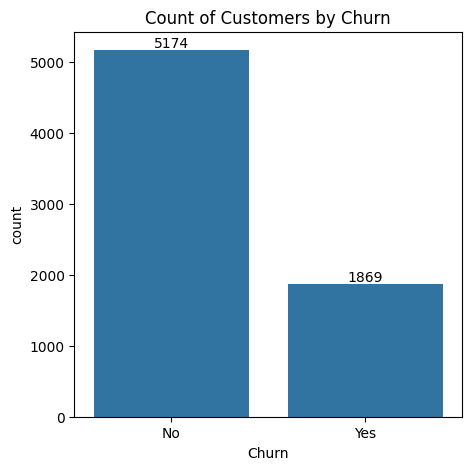

In [56]:
plt.figure(figsize=(5,5))
count = sns.countplot(x = "Churn", data = df)
count.bar_label(count.containers[0]) # Now it will show the count on the bars.
plt.title("Count of Customers by Churn")
plt.show()

#### Now I wanted to see the %age of Partition. So I will do......

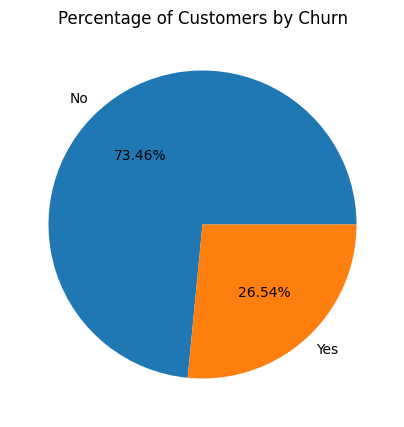

In [54]:
plt.figure(figsize=(5,5))
gb=df.groupby("Churn").agg({"Churn": "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.2f%%')
plt.title("Percentage of Customers by Churn")
plt.show()

#### Here I got the Percentage of SeniorCitizen in the dataset.

#### But why is it coming like that? Let's find out.....

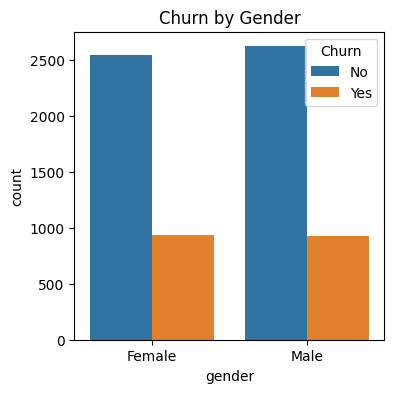

In [48]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender", data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

#### This plot says, it is not Gender specific. It means it does not matter that more males or females are churning out. It is almost equal.

#### Now, I want to make a Histogram on the basis of Tenure. So, let's make it.

Text(0.5, 1.0, 'Churn by Tenure')

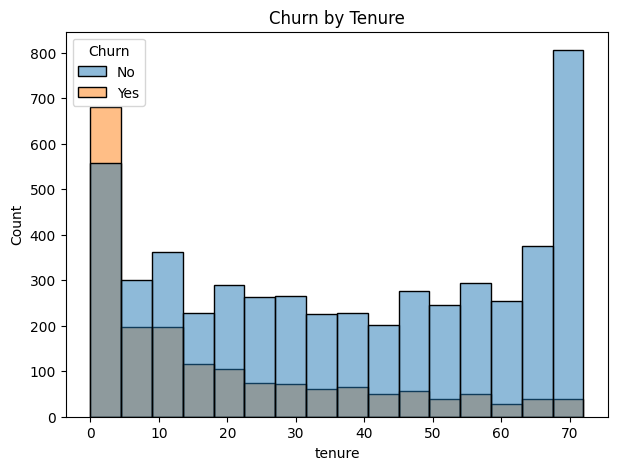

In [59]:
plt.figure(figsize=(7,5))
sns.histplot(data = df, x = "tenure", hue = "Churn")
plt.title("Churn by Tenure")

#### Well, conditions are surprising, many of the people have churned out in the initial two months and then the number of churned out customers is decreasing.

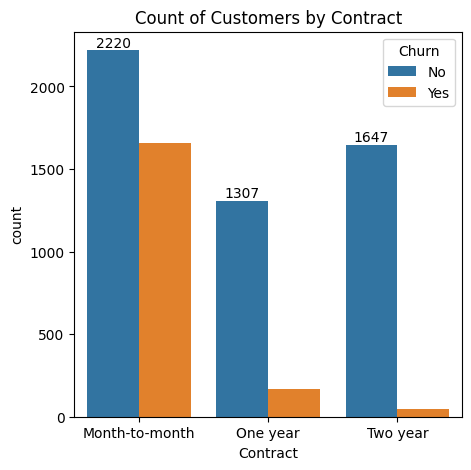

In [61]:
plt.figure(figsize=(5,5))
count = sns.countplot(x = "Contract", data = df, hue="Churn")
count.bar_label(count.containers[0]) # Now it will show the count on the bars.
plt.title("Count of Customers by Contract")
plt.show()

#### It shows our most customers are on Month-to-Month Contract. But Monthly Contract customers are churning out more than the other two. This is a serious issue.

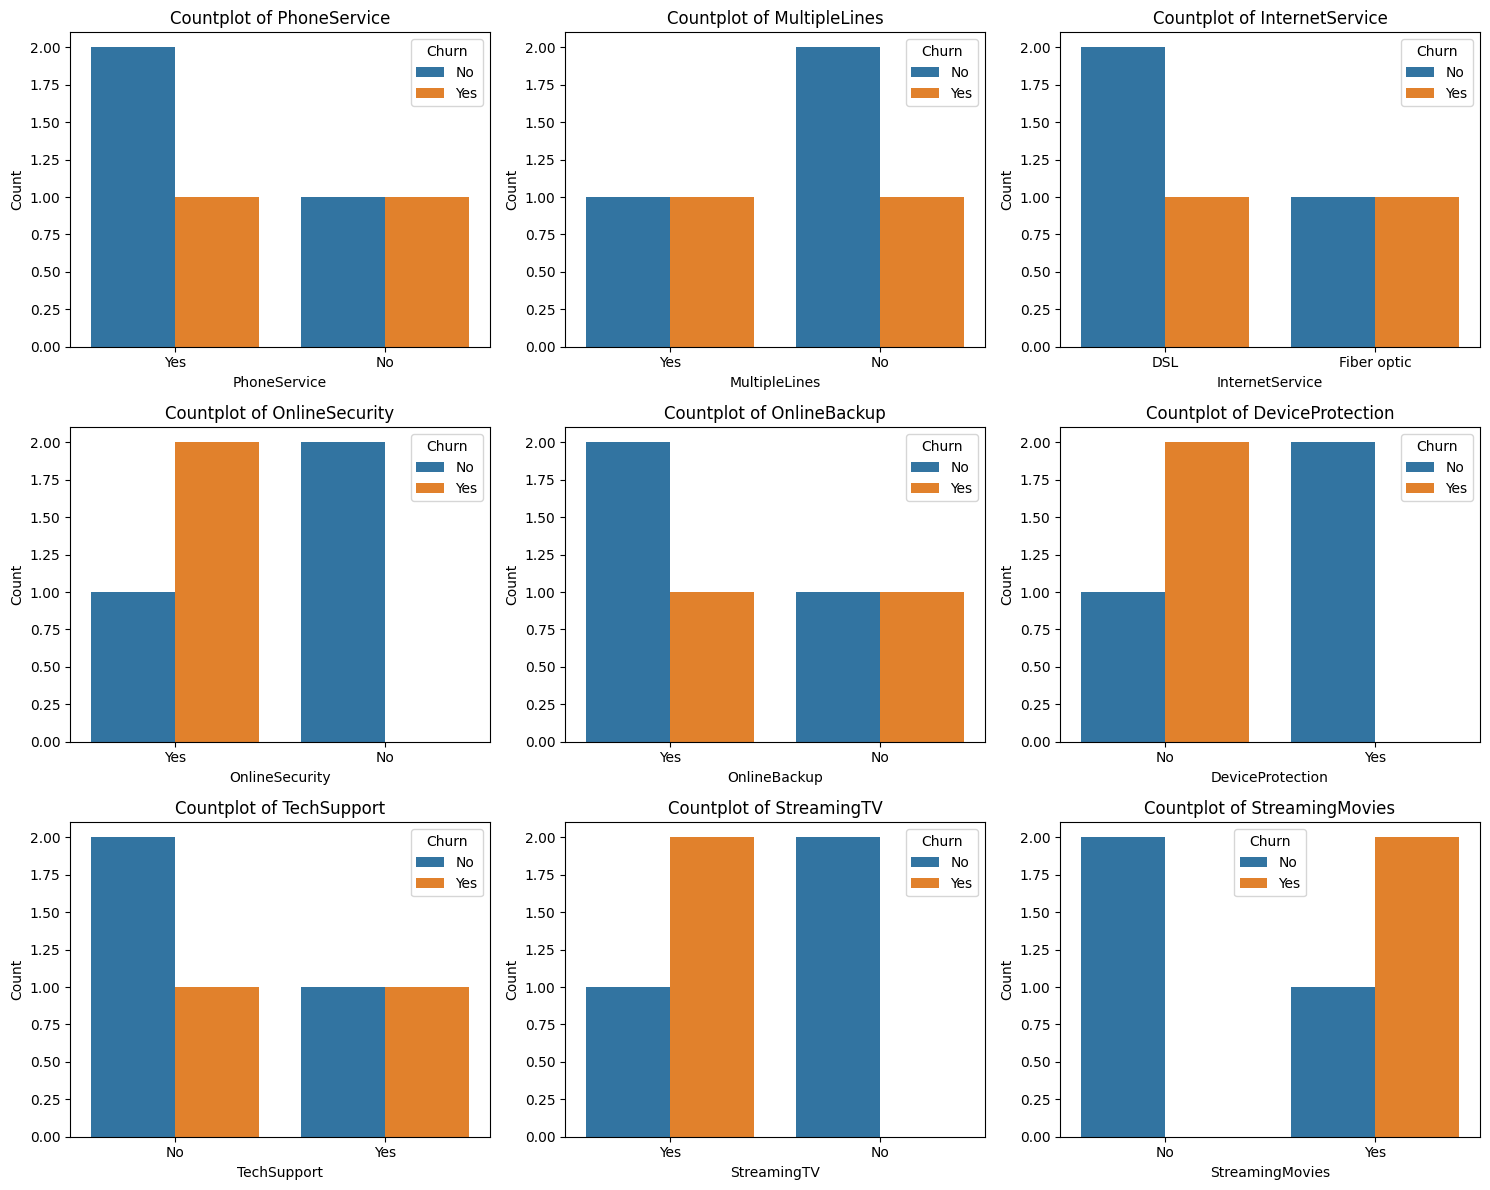

In [66]:
# Example DataFrame (replace this with your actual data)
# data = pd.read_csv('your_data.csv')
data = pd.DataFrame({
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'MultipleLines': ['Yes', 'No', 'Yes', 'No', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'DSL', 'Fiber optic'],
    'OnlineSecurity': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'OnlineBackup': ['Yes', 'No', 'No', 'Yes', 'Yes'],
    'DeviceProtection': ['No', 'Yes', 'No', 'Yes', 'No'],
    'TechSupport': ['No', 'Yes', 'No', 'No', 'Yes'],
    'StreamingTV': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingMovies': ['No', 'Yes', 'Yes', 'No', 'Yes']
})

# List of columns for subplots
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the matplotlib figure and subplots (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the columns and create a countplot for each one
for i, column in enumerate(columns):
    sns.countplot(data=data, x=column, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_xlabel(column)  # Set column name as x-label
    axes[i].set_ylabel('Count')  # Set y-label as Count

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


#### Services like PhoneService and InternetService have higher customer retention, indicated by taller blue bars (No churn). Features like OnlineSecurity, TechSupport, and StreamingTV seem to have a more significant influence on churn, where customers with these services show higher churn rates (orange bars). Overall, customers who lack extra features (like OnlineSecurity, TechSupport) seem more likely to churn.

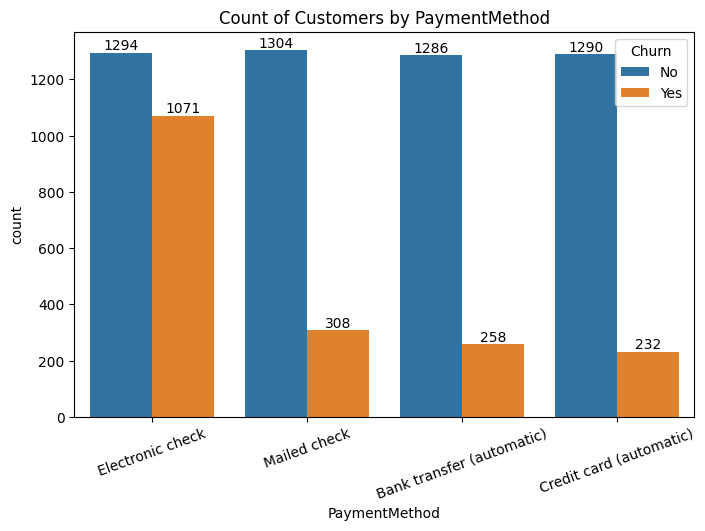

In [79]:
plt.figure(figsize=(8,5))
count = sns.countplot(x = "PaymentMethod", data = df, hue="Churn")
count.bar_label(count.containers[0]) # Now it will show the count on the bars.
count.bar_label(count.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.xticks(rotation=20)
plt.show()

#### Customer is likely to churn when it uses Electronic check as payment method.